In [1]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('AirPassengers.csv')
data2 = data.copy()
data.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [3]:
data.dtypes

date     object
value     int64
dtype: object

In [4]:
data['date'] = pd.to_datetime(data['date'])
data.dtypes

date     datetime64[ns]
value             int64
dtype: object

In [5]:
data.isnull().sum()

date     0
value    0
dtype: int64

In [6]:
data.describe()

,value
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
data.rename(columns=({'date':'Date','value':'Value'}),inplace=True)

In [8]:
data.head(2)

,Date,Value
0,1949-01-01,112
1,1949-02-01,118


In [9]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data.drop(columns='Date',inplace=True)
data

,Value,Year,Month
0,112,1949,1
1,118,1949,2
2,132,1949,3
3,129,1949,4
4,121,1949,5
...,...,...,...
139,606,1960,8
140,508,1960,9
141,461,1960,10
142,390,1960,11


In [10]:
from datetime import datetime

In [11]:
def convert_months(month):
    return datetime.strptime(str(month),'%m').strftime('%B')
data['Month'] = data['Month'].apply(convert_months)
data.head()

,Value,Year,Month
0,112,1949,January
1,118,1949,February
2,132,1949,March
3,129,1949,April
4,121,1949,May


In [12]:
data = data.reindex(columns=['Year','Month','Value'])
data.head(3)

,Year,Month,Value
0,1949,January,112
1,1949,February,118
2,1949,March,132


In [13]:
data.dtypes

Year      int64
Month    object
Value     int64
dtype: object

In [14]:
data.corr()

,Year,Value
Year,1.000000,0.921824
Value,0.921824,1.000000


<BarContainer object of 144 artists>

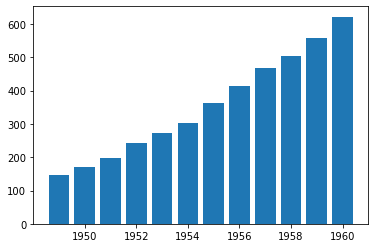

In [15]:
plt.bar(data['Year'],data['Value'])

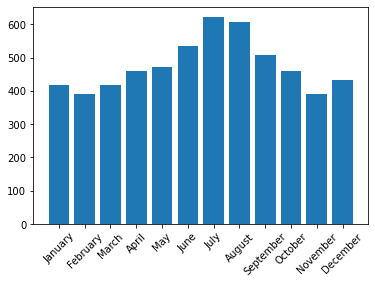

In [16]:
plt.bar(data['Month'],data['Value'])
plt.xticks(rotation=45);

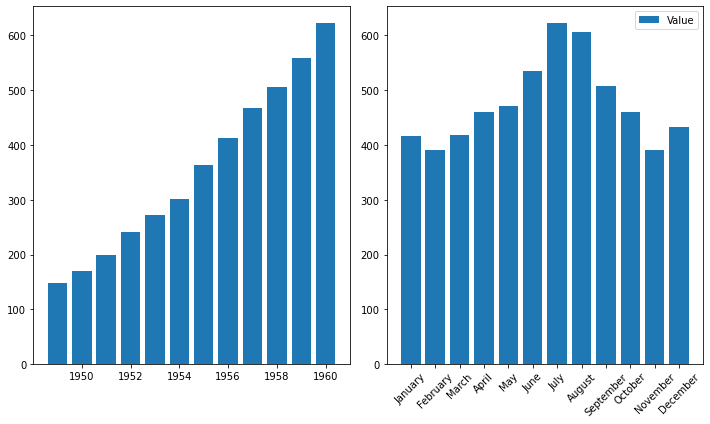

In [17]:
fig,ax = plt.subplots(1,2,figsize=(10,6))
ax[0].bar(data['Year'],data['Value'],label='Value')
ax[1].bar(data['Month'],data['Value'],label='Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout();

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

X = data['Year'].values.reshape(-1,1)
y = data['Value'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_pred

print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(model.coef_[0])
print(model.intercept_)

36.155294229337
0.8269227273393319
1996.1204792633018
33.16827015828014
-64543.68916867277


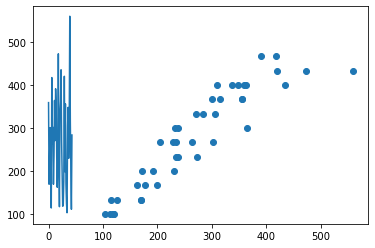

In [19]:
plt.scatter(x=y_test,y=y_pred)
plt.plot(y_test)

In [20]:
data[data['Month'] == 'January']

,Year,Month,Value
0,1949,January,112
12,1950,January,115
24,1951,January,145
36,1952,January,171
48,1953,January,196
60,1954,January,204
72,1955,January,242
84,1956,January,284
96,1957,January,315
108,1958,January,340


In [22]:
data2.head(2)

,date,value
0,1949-01-01,112
1,1949-02-01,118


In [23]:
data2['date'] = pd.to_datetime(data2['date'])